### Optmization

In this notebook we are going to show a simple optimization process and illustrate the concept of cost surface.

In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Amount of inliers:  500
Amount of outliers: 50


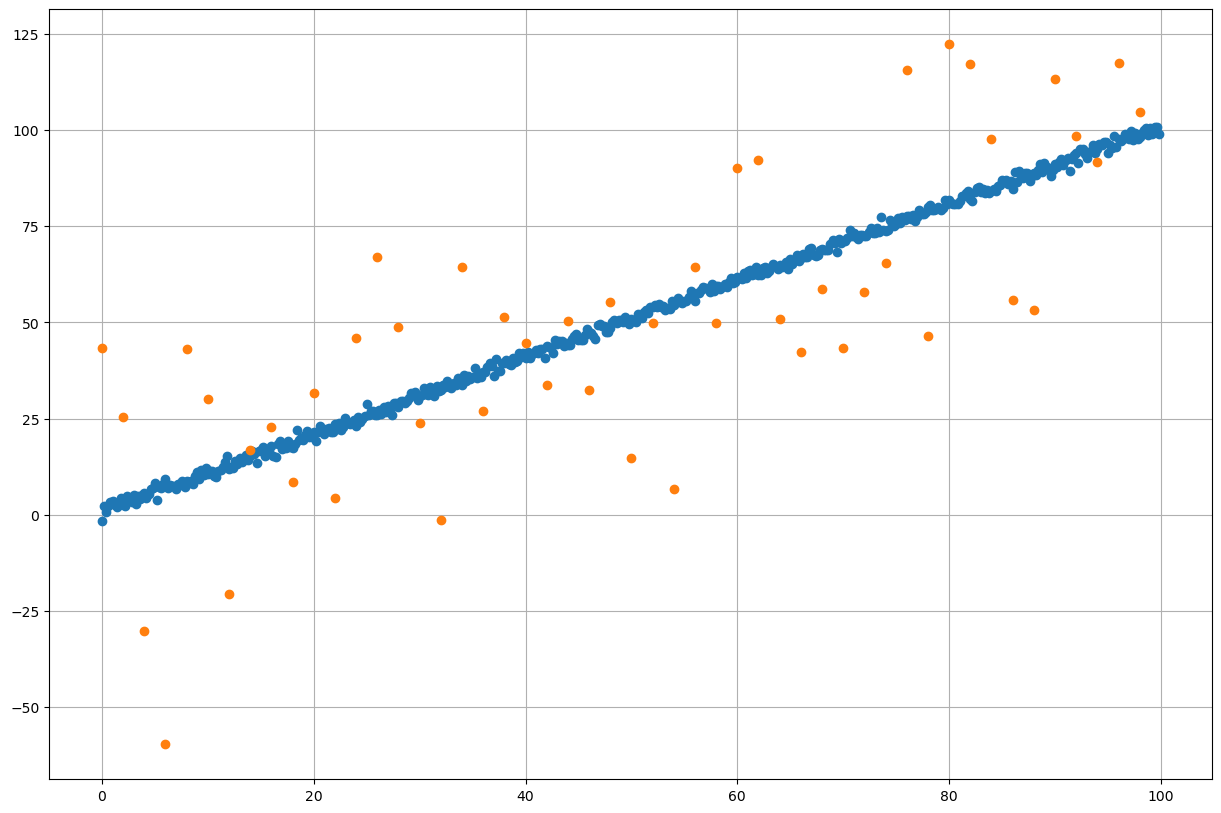

In [2]:
# Target hyper-parameters
slope = 45
slope = np.tan(np.deg2rad(slope))
offset = 1

# Let's contaminate target data with noise
x_data = np.arange(0, 100, 0.2)
y_data = slope*x_data + offset + np.random.randn(len(x_data))

# Add unrelated samples (outliers) to dataset
x_noise = np.arange(0, 100, 2)
y_noise = slope*x_noise + offset + 25*np.random.randn(len(x_noise))

plt.plot(x_data, y_data, 'o'), plt.grid(True)
plt.plot(x_noise, y_noise, 'o'), plt.grid(True)

# Mix true (noisy) data and outliers
x = np.concatenate((x_data, x_noise))
y = np.concatenate((y_data, y_noise))
indices = range(len(x))

print('Amount of inliers: ', len(x_data))
print('Amount of outliers:', len(x_noise))


In [3]:
# Define distance from point to line
def distance(a, b, c, x_point, y_point):
    numerator = np.abs(a*x_point + b*y_point + c)
    denominator = np.sqrt(a**2 + b**2)
    return numerator/denominator

alpha = np.arange(0, 360)
offset = np.arange(-100, 100)
cost = np.zeros((len(offset), len(alpha)))

for idx_alpha in range(len(alpha)):
    for idx_offset in range(len(offset)):
        slope = np.tan(np.deg2rad(alpha[idx_alpha]))        
        cost[idx_offset, idx_alpha] = np.mean(distance(-slope, 1, -offset[idx_offset], x, y))
        
        

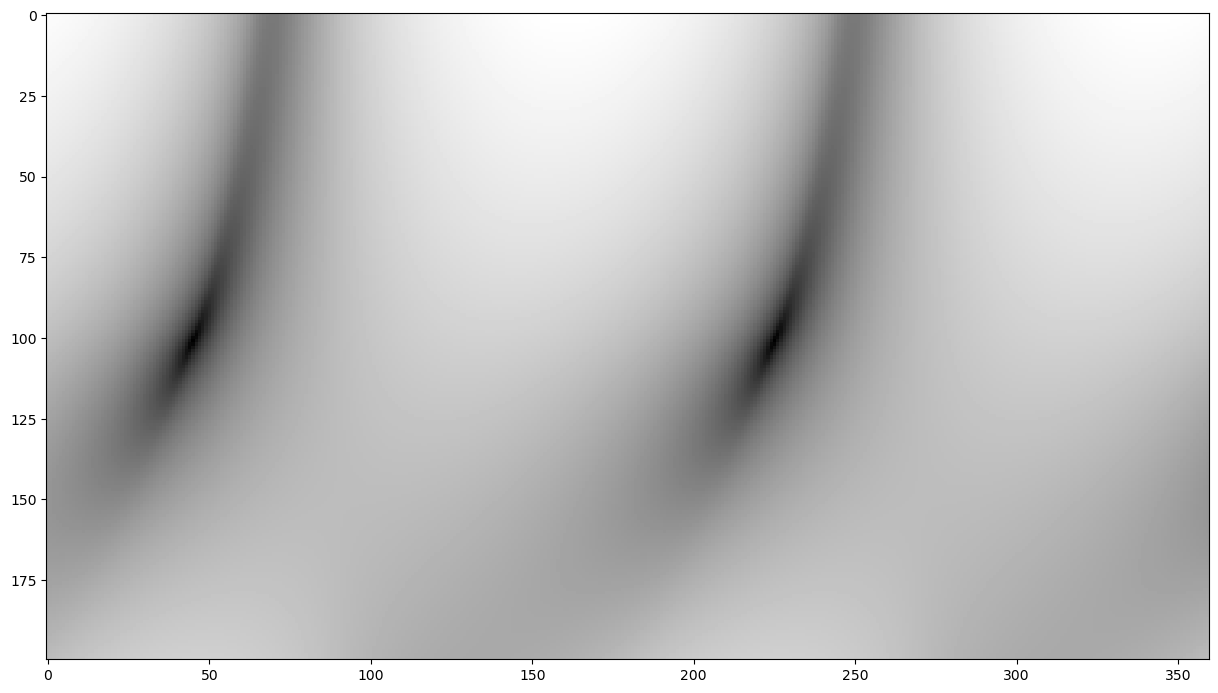

In [6]:
plt.imshow(np.log(cost), cmap='gray')
plt.show()